<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">Abril 2021</p>
<p style="margin: 0; text-align:right;">Data Analytics - GMI</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Implementando métodos de CLUSTERING con python

La librería **scikit-learn** contiene implementaciones en Python de los principales algoritmos de clustering, así como de la mayoría de las métricas de distancia (**scipy.spatial.distance** también tiene implementación de estas métricas). 

Existen algunos otros algoritmos más avanzados que no estudiaremos en esta asignatura que pueden implementarse con otra librería llamada **pyclustering**. 

En concreto vamos a implementar las siguientes técnicas y algunos de los algoritmos más utilizados:
- Métodos particionales: **KMeans**
- Métodos jerárquicos: clustering jerárquico **aglomerativo**
- Métodos basados en densidad: **DBSCAN**

Librerías que necesitaremos:

In [3]:
# Para el manejo de los datos
import numpy as np
import pandas as pd

# Para la visualización de los datos
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# Obtención de los datasets que utilizaremos a lo largo del notebook
import statsmodels.api as sm
from sklearn import datasets

# Preprocesado de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Cálculo de distancias
from sklearn.metrics import pairwise_distances

# Modelos de clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

# Evaluación del clustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

En caso de no tener alguna de estas librerías, utilizad conda o pip para instalarlas.

Configuración de la visualización

In [4]:
plt.style.use('ggplot')

%matplotlib inline

Índice:
1) Cálculo de métricas de distancia

2) Métodos de clustering e implementación de algoritmos

    2.1) Métodos particionales: KMeans
    
    2.2) Métodos jerárquicos: clustering jerárquico aglomerativo
    
    2.3) Métodos basados en densidad: DBSCAN
    
3) Evaluación y validación de los resultados, optimización del número de clusters

## 1) Cálculo de metricas de distancia

Vamos a utilizar el dataset USArrests, que contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y violaciones (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas urbanas (UrbanPoP). Empleando estas variables, se pretende calcular una matriz de distancias que permita identificar los estados más similares.

In [6]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(4)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [7]:
datos

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [ ]:
print(USArrests.__doc__)

.. container::

   ========= ===============
   USArrests R Documentation
   ========= ===============

   .. rubric:: Violent Crime Rates by US State
      :name: violent-crime-rates-by-us-state

   .. rubric:: Description
      :name: description

   This data set contains statistics, in arrests per 100,000 residents
   for assault, murder, and rape in each of the 50 US states in 1973.
   Also given is the percent of the population living in urban areas.

   .. rubric:: Usage
      :name: usage

   ::

      USArrests

   .. rubric:: Format
      :name: format

   A data frame with 50 observations on 4 variables.

   ==== ======== ======= =============================
   [,1] Murder   numeric Murder arrests (per 100,000)
   [,2] Assault  numeric Assault arrests (per 100,000)
   [,3] UrbanPop numeric Percent urban population
   [,4] Rape     numeric Rape arrests (per 100,000)
   ==== ======== ======= =============================

   .. rubric:: Note
      :name: note

   ``USArrests`

In [ ]:
# Escalamos las variables
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794


Utilizando distintas métricas de distancia, veremos cómo varian las matrices de distancia.

(Sklearn permite calcular las distancias: ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’, ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’ y ‘yule’.)

In [ ]:
# Cálculo de distancias
distancias = pairwise_distances(X= datos_scaled,
                                metric ='chebyshev')
                                #p=1)

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(distancias,
                          columns=datos_scaled.index,
                          index = datos_scaled.index)

distancias.iloc[:4,:4]

,Alabama,Alaska,Arizona,Arkansas
Alabama,NaN,NaN,NaN,NaN
Alaska,2.512875,NaN,NaN,NaN
Arizona,1.535317,2.233189,NaN,NaN
Arkansas,1.020471,2.696218,2.093615,NaN


Se reestructura la matriz de distancias para poder ordenar los pares de observaciones por orden de distancia.

In [ ]:
# Top n observaciones más similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(3)

,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.194128
631,New York,Illinois,0.226482
665,Kansas,Indiana,0.323546


In [ ]:
# Top n observaciones menos similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .tail(3)

,estado_a,estado_b,distancia
244,Vermont,California,4.117442
927,Nevada,Maine,4.119821
1383,North Dakota,Nevada,4.173745


Visualización de las variables en los estados menos y más similares

C:\Users\josev\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\josev\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


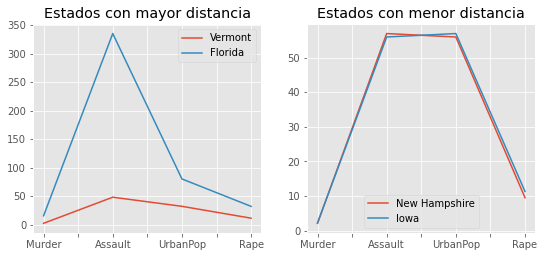

In [ ]:
# Estados con mayor y menor distancia
fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['Vermont', 'Florida']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con mayor distancia')
datos.loc[['New Hampshire', 'Iowa']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con menor distancia');

## 2) Métodos de clustering e implementación de algoritmos

En esta sección vamos a ver cómo implementar simplemente los algoritmos de clustering para obtener los modelos a partir de las diferentes técnicas. Utilizaremos en este caso el dataset de sklearn iris.

In [ ]:
# Cargamos los datos 
iris = datasets.load_iris()

# Descripción del dataset
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# Escalamos
iris_scaled = scale(X=iris['data'], with_mean=True, with_std=True) 
iris_scaled = pd.DataFrame(iris_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
# Si queremos comprobar que hemos escalado bien los datos podemos la funcion describe() y comprobar la media y la std
iris_scaled.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


### 2.1) Particionales: KMeans

**Generación del modelo KMeans:**

Con la clase sklearn.cluster.KMeans de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo k-means. Entre sus parámetros destacan:

- n_clusters: determina el número  K  de clusters que se van a generar.

- init: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.

- n_init: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.

- max_iter: número máximo de iteraciones permitidas.

- random_state: semilla para garantizar la reproducibilidad de los resultados.

In [ ]:
# Generamos el modelo
kmeans=KMeans(n_clusters=3)
kmeans.fit(iris_scaled)

# Obtenemos a qué cluster pertence cada instancia
labels = kmeans.labels_

In [ ]:
# Obtenemos a qué cluster pertence cada instancia
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
# Obtenemos los centroides como los puntos representativos de cada cluster
print(kmeans.cluster_centers_)

[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


In [ ]:
# Obtenemos el número de iteraciones que han sido necesarias para converger
print(kmeans.n_iter_)

4


In [ ]:
# Obtenemos el valor mínimo de la inercia
print(kmeans.inertia_)

139.8204963597498


**Visualización** en dos dimensiones mediante **PCA**

In [ ]:
# Realizamos un Análisis de Componentes Principales
pca=PCA(n_components=2)
iris_pca=pca.fit_transform(iris_scaled)

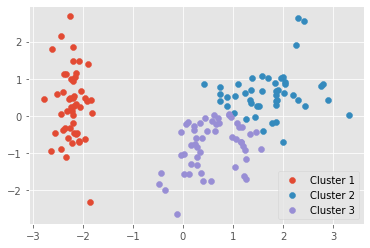

In [ ]:
# Visualizamos las instancias en las dos dimensiones correspondientes con las componentes obtenidas
# Coloreamos por cluster
plt.scatter(iris_pca[labels==0, 0], iris_pca[labels==0, 1], label='Cluster 1')
plt.scatter(iris_pca[labels==1, 0], iris_pca[labels==1, 1], label='Cluster 2')
plt.scatter(iris_pca[labels==2, 0], iris_pca[labels==2, 1], label='Cluster 3')
plt.legend()
plt.show()

Podemos utilizar el **método del codo** para intuir el mejor número de clusters, como se muestra a continuación.

In [ ]:
# Guardamos en una lista los valores de inercia variando K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris_scaled)
    inertia.append(kmeans.inertia_)

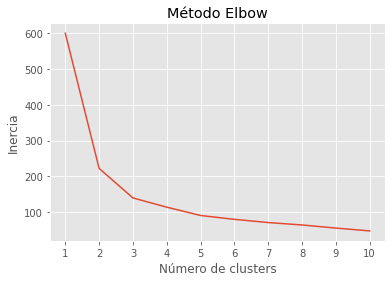

In [ ]:
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

Podemos utilizar la librería kneed si no somos capaces de identificar el codo a simple vista. 

En caso de no tener instalada esta librería:

```conda install -c conda-forge kneed ```

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), 
                 inertia, 
                 curve="convex", 
                 direction="decreasing")
kl.elbow

ModuleNotFoundError: No module named 'kneed'

El **coeficiente de silhouette** mide la cohesión y separación. Cuantifica cómo de bien un punto se ajusta al cluster que ha sido asignado en base a dos factores:

1. Cuanto de cercano es el punto a otros puntos en el mismo cluster
2. Cuanto de lejano está el punto de los puntos en otros clusters

El coeficiente de silhouette varía entre -1 y 1. Valores mayores indican que las observaciones son más cercanas a los clusters en los cuáles han sido asignadas que a los otros clusters.

Podemos calcular la media del coefficiente de silhouette para una configuración de clusters como métrica de evaluación interna. También se puede analizar la distribución de los distintos valores del coeficiente de silhouette a lo largo de los clusters de una configuración en particular.

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris_scaled)
    score = silhouette_score(iris_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k shows that different options for the number of clusters. The results do not say the same thing as the elbow method did.

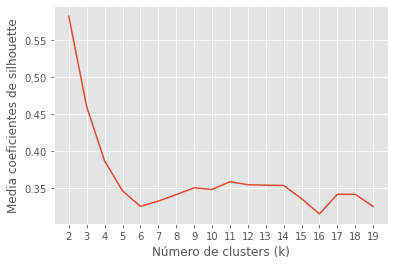

In [ ]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Número de clusters (k)")
plt.ylabel("Media coeficientes de silhouette")
plt.show()

A continuación haremos una comparativa entre el coeficiente de silhouette para distinto número de clusters k. Observaremos la distribución de los valores de dicho coeficiente en cada una de las configuraciones.

In [ ]:
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    """Función que nos permite hacer un análisis de silhouette completo."""
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("Para k =", n_clusters,
              "La media de silhouette es :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("El gráfico de silhouette para los distintos clusters.")
        ax1.set_xlabel("Los valores del coeficiente de silhouette")
        ax1.set_ylabel("Número de cluster")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("Visualización de los datos en clusters.")
        ax2.set_xlabel("Componente 1 de la PCA")
        ax2.set_ylabel("Componente 2 de la PCA")

        plt.suptitle(("\nAnálisis de silhouette para clustering con KMeans "
                      "con k = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

Para k = 2 La media de silhouette es : 0.5817500491982808
Para k = 3 La media de silhouette es : 0.45994823920518635
Para k = 4 La media de silhouette es : 0.383850922475103
Para k = 5 La media de silhouette es : 0.34273996820787694
Para k = 6 La media de silhouette es : 0.3239092632329394
Para k = 7 La media de silhouette es : 0.34002505035307184
Para k = 8 La media de silhouette es : 0.3455127879173411
Para k = 9 La media de silhouette es : 0.3356987224165842
Para k = 10 La media de silhouette es : 0.3607680329722999


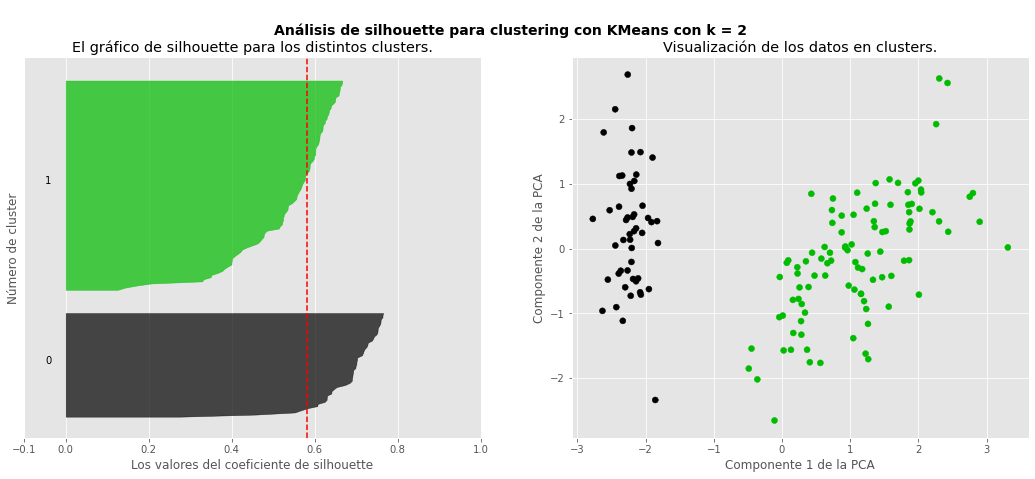

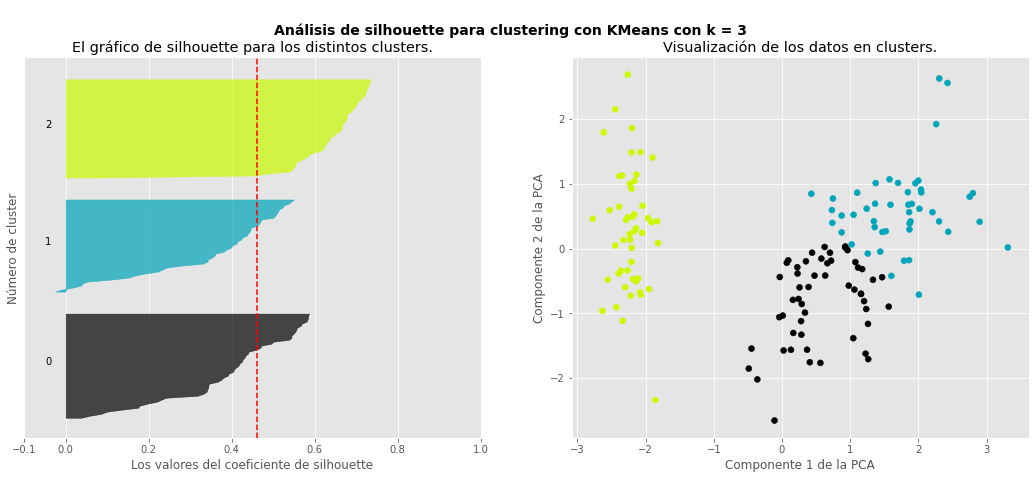

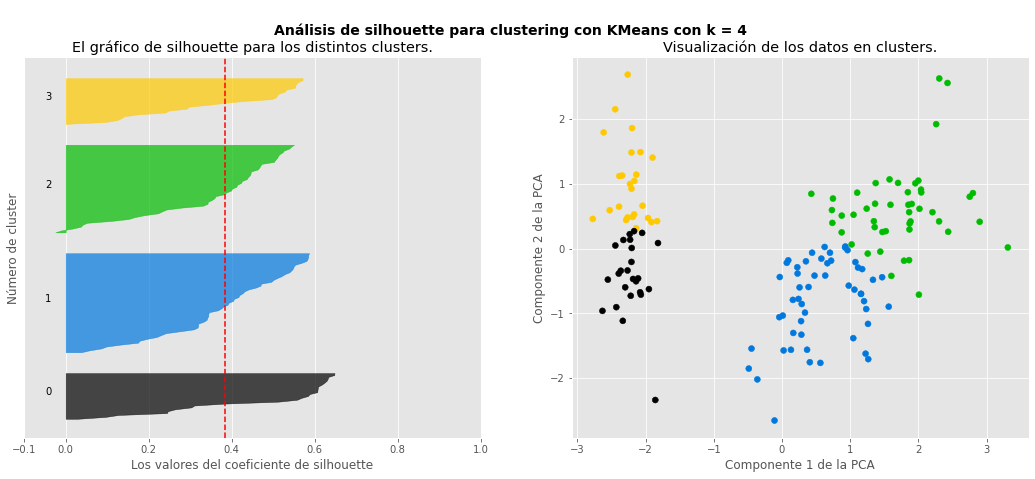

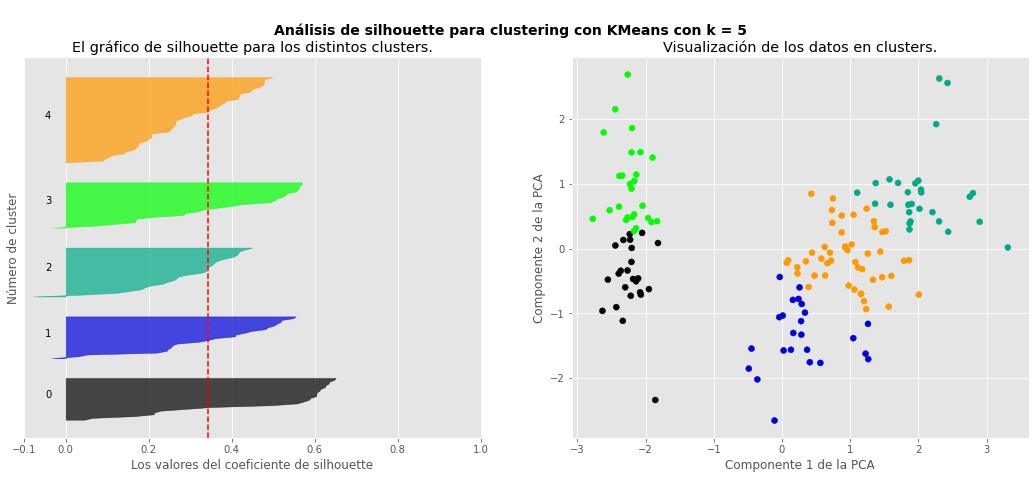

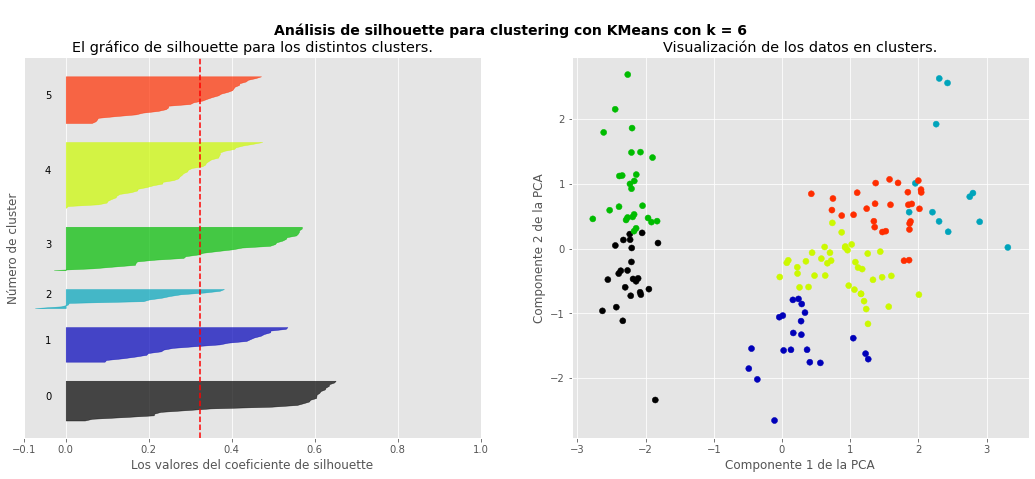

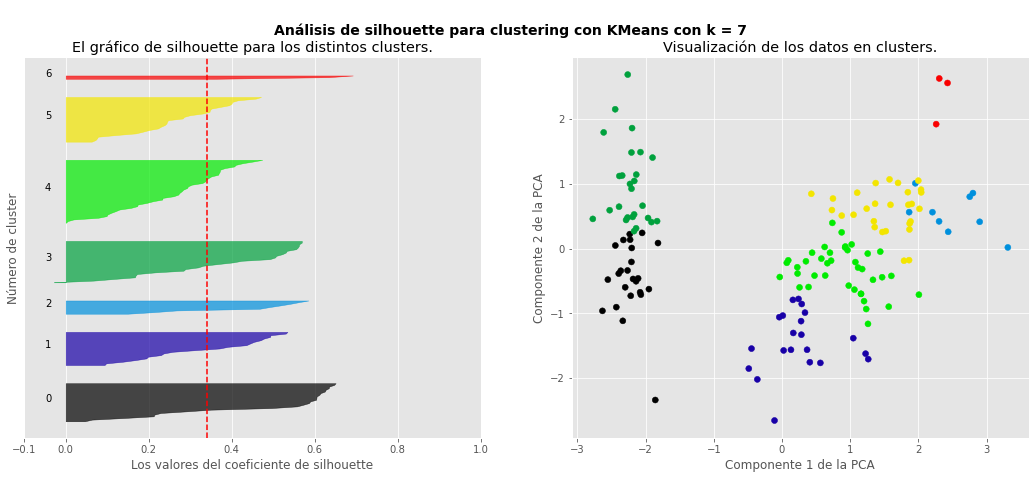

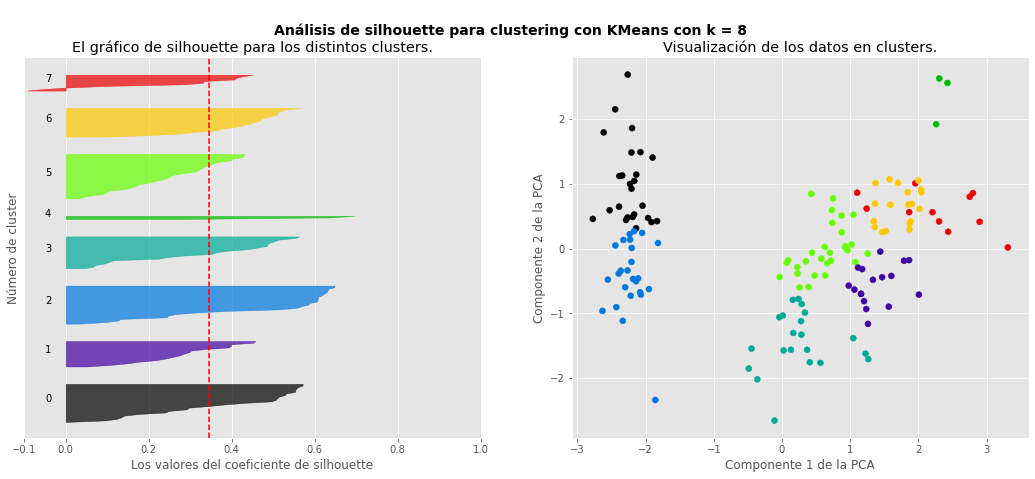

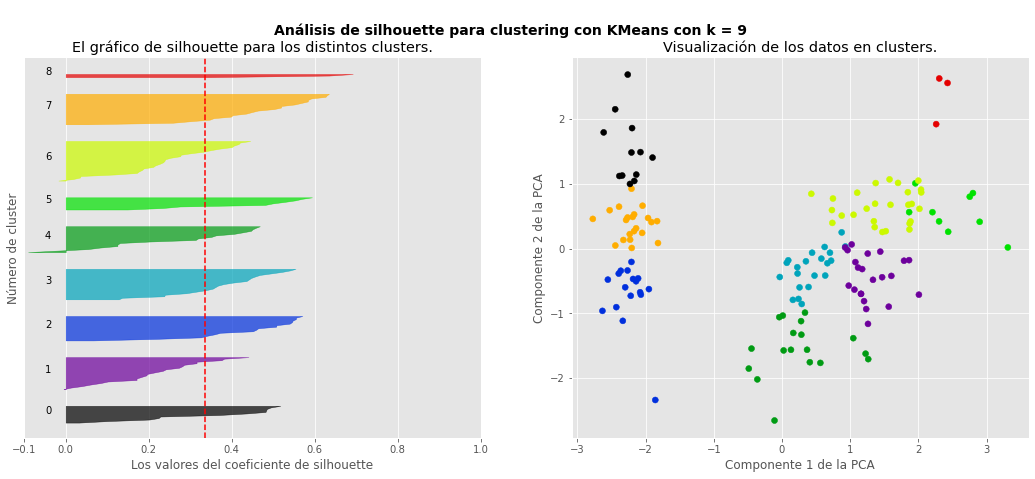

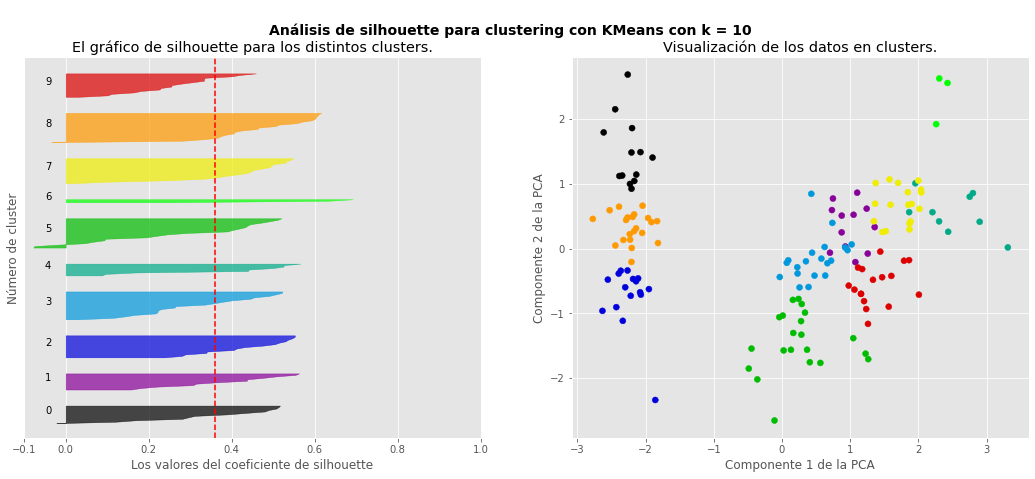

In [ ]:
silhouette_analysis(np.array(iris_scaled), 
                    pd.DataFrame(iris_pca), 
                    [2, 3, 4, 5, 6, 7, 8, 9, 10])

### 2.2) Clustering jerárquico

In [ ]:
distances_linkage = linkage(iris_scaled, 
                            method='ward',
                            metric='euclidean')

In [ ]:
distances_linkage

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.53000000e+02, 1.72216546e

In [ ]:
plt.style.use('default')

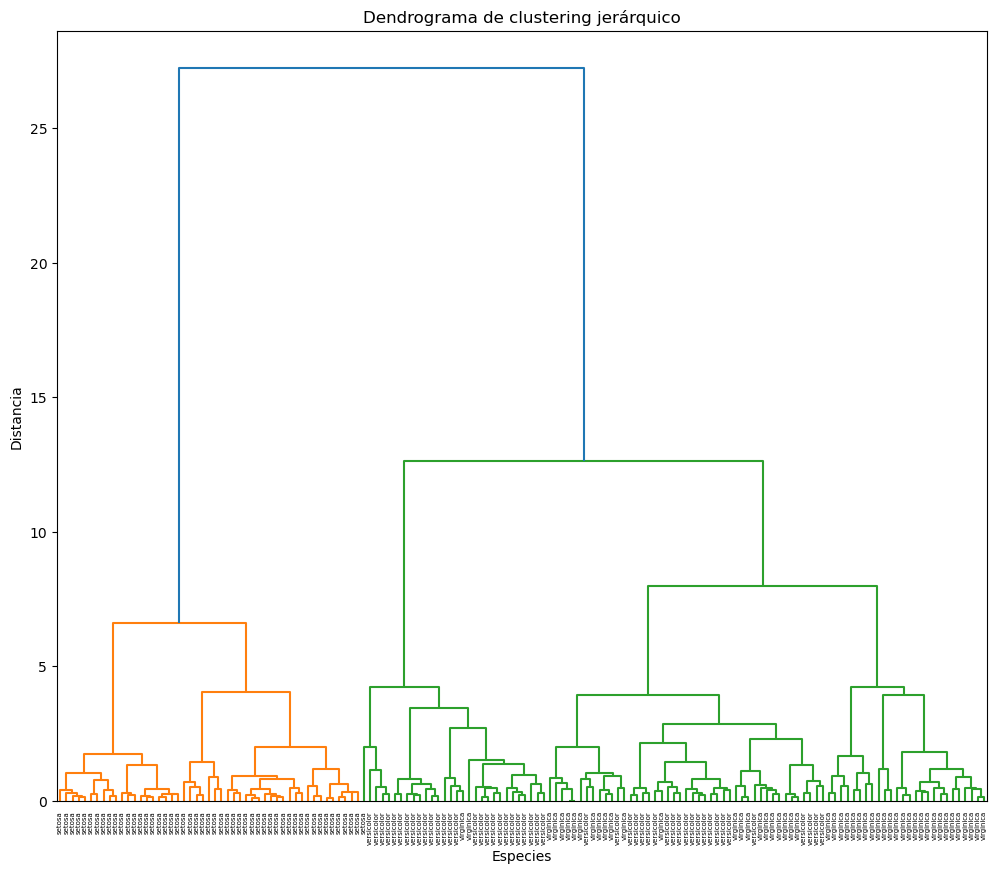

In [ ]:
plt.figure(figsize=(12, 10))

plt.title('Dendrograma de clustering jerárquico')
plt.xlabel('Especies')
plt.ylabel('Distancia')

dendrogram(distances_linkage,
           #color_threshold = 0,
           labels=iris.target_names[iris.target]
          )
plt.show()

### 2.3) Basados en densidad: DBSCAN

Para implementar este algoritmo, deberemos fijar dos parámetros: Eps y MinPts.

Partiendo de la definición de *cluster* en esta técnica (región de densidad de puntos superior a Eps con MinPts), podemos como idea utilizar la densidad de puntos del cluster menos denso como parámetro...

¿Cómo lo hacemos? Podemos usar un método heurístico que sería examinar las distancias de los k vecinos más cercanos. Ploteamos el gráfico de la k-distancia de todos los objetos, ordenada en orden decreciente. Examinamos las curvas para varios valores de MinPts y seleccionamos el punto *o* del gráfico con un cambio más brusco: fijamos Eps como MinPts-distancia(*o*).

A continuación se muestra cómo podría implementarse esta heurística.

Text(0, 0.5, 'Distancia k-vecinos (k=5)')

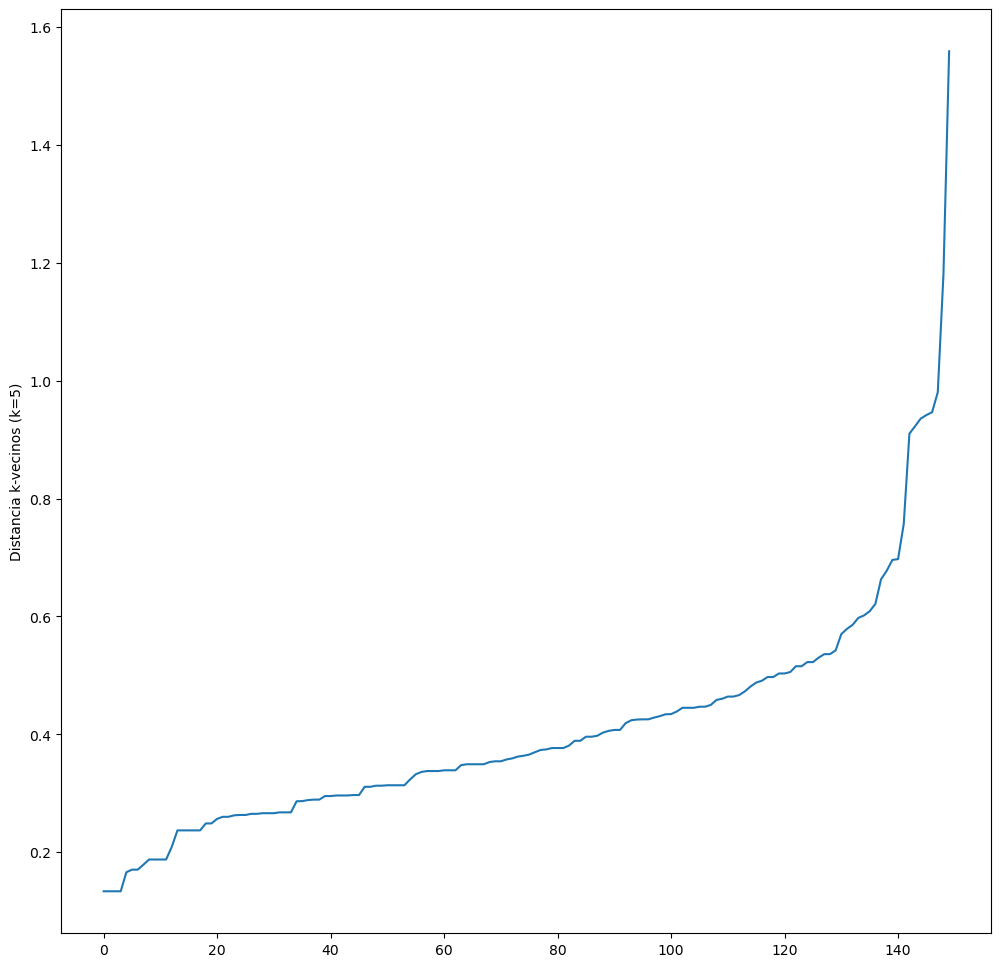

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs=NearestNeighbors(n_neighbors=5)
nbrs.fit(iris_scaled)

distances, _=nbrs.kneighbors(iris_scaled)

fig=plt.figure(figsize=(12, 12))

plt.plot(range(0, len(distances)), sorted(distances[:,2]))

plt.ylabel("Distancia k-vecinos (k=5)")

Eligiríamos un Eps de 0.8

In [ ]:
db=DBSCAN(eps=0.8, min_samples=5)
db.fit(iris_scaled)
labels=db.labels_

In [ ]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

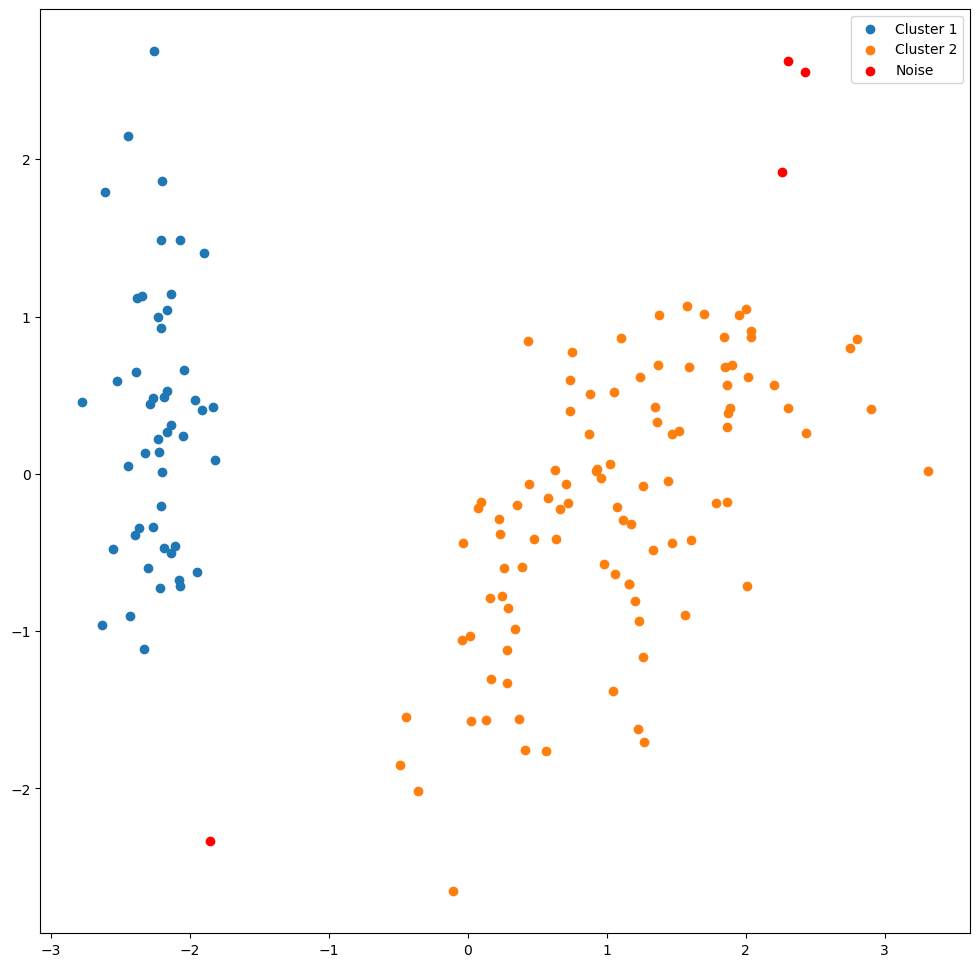

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(iris_pca[labels==0, 0], iris_pca[labels==0, 1], label='Cluster 1')
plt.scatter(iris_pca[labels==1, 0], iris_pca[labels==1, 1], label='Cluster 2')
plt.scatter(iris_pca[labels==-1, 0], iris_pca[labels==-1, 1], label='Noise', c ='red')
plt.legend()
plt.show()

## 3) Optimización del número de cluster e hiperparámetros, evaluación y validación de los resultados

- Optimización del número de clusters:
    - Método Elbow
    - Coeficiente de silhouette


- Evaluación:
    - Metricas intrínsecas o internas
    - Métricas extrínsecas o externas
    
**¡¡IMPORTANTE!!** Validación e interpretación de los resultados obtenidos